In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm
plt.style.use('seaborn-white')


df = yf.download('^FCHI')
df.columns = df.columns.str.lower()
df

log_return = np.log(df.close/df.close.shift(1))

mean = log_return.mean()
std = log_return.std(ddof=0)
x = np.linspace(log_return.min(), log_return.max(), 1000)

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

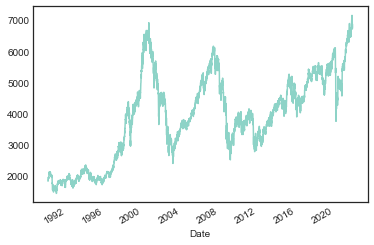

In [7]:
df.close.plot()

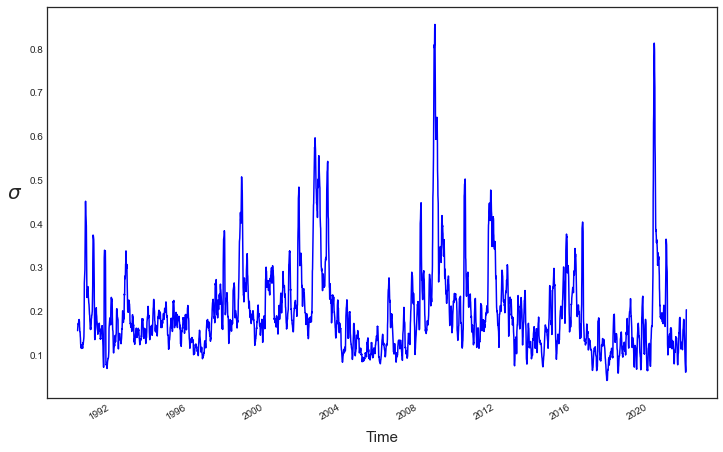

In [26]:

plt.figure(figsize=(12, 8))

log_return.rolling(20).std().mul(255**0.5).rolling(5).mean().plot(c='b')

plt.xlabel('Time', fontsize=15, labelpad=10)
plt.ylabel('$\sigma$', fontsize=20, labelpad=15).set_rotation(0)
plt.show()

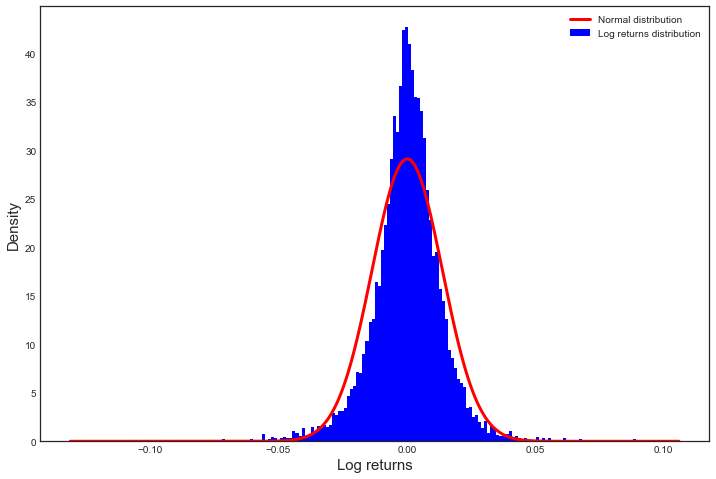

In [20]:
plt.style.use('seaborn-white')
plt.figure(figsize=(12, 8))

plt.hist(log_return, density=True, bins=200, color='b')
plt.plot(x, norm.pdf(x, loc=mean, scale=std), c='r', lw=3)

plt.xlabel('Log returns', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.legend(['Normal distribution', 'Log returns distribution'])

plt.show()

0
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.9741
1
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.9735
2
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.9748
3
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.9751
4
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.9787
5
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.9755
6
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.9794
7
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.9806
8
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.9827
9
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.9841
10
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.9856
11
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.9893
12
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.9964
13
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.9967
14
The price of 

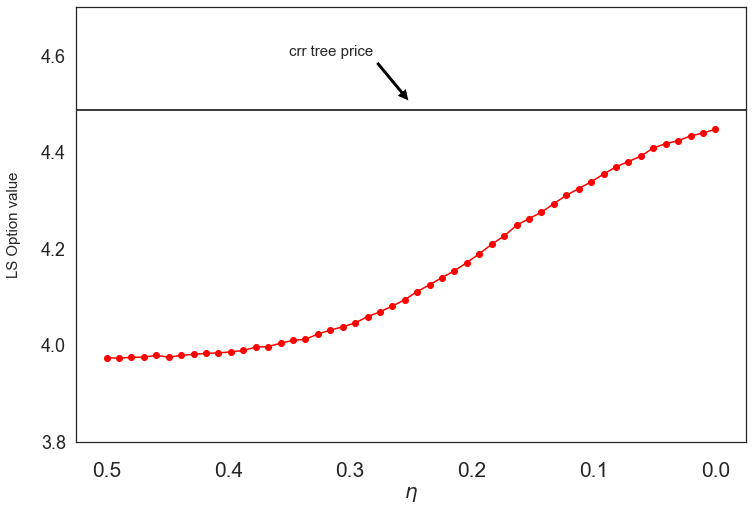

Wall time: 36min 15s


In [3]:
%%time

from option import Option 
from process import HestonProcess
from pricing import monte_carlo_simulation_LS

put_1 = Option(s0=36, v0=0.04, T=1, K=40, call=False)

eta_list = np.linspace(0, 0.5, 50)[::-1]

plt.figure(figsize=(12, 8))
prices = []
for i, eta in enumerate(eta_list):
    print(i)
    heston = HestonProcess(mu=0.06, kappa=0.0005, theta=0.04, eta=eta, rho=-0.5)
    price = monte_carlo_simulation_LS(option=put_1, process=heston, n=2_000_000, m=20)
    prices.append(price)

plt.plot(eta_list, prices, c='r', marker='o')
plt.axhline(y=4.487, c='k')
plt.annotate('crr tree price', xy=(0.25, 4.5), xycoords='data', xytext=(0.35, 4.6),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=15)
plt.gca().invert_xaxis()
plt.xlabel('$\eta$', fontsize=20)
plt.ylabel('LS Option value', fontsize=15, labelpad=20)
plt.tick_params(axis='y', which='major', labelsize=18, pad=10)
plt.tick_params(axis='x', which='major', labelsize=21, pad=20)
plt.ylim(3.8, 4.7)
plt.show()

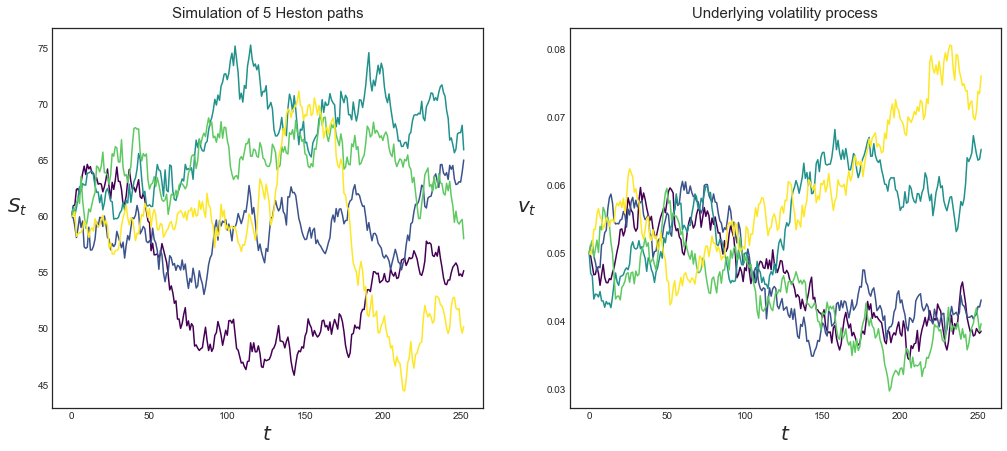

In [2]:
import cycler
import matplotlib as mpl
from process import HestonProcess

heston = HestonProcess(mu=0.06, kappa=0.0005, theta=0.04, eta=0.1, rho=-0.5)
s, v = heston.simulate(s0=60, v0=0.05, T=1, n=5, m=252, return_vol=True)


color = plt.cm.viridis(np.linspace(0, 1, 5))
mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)

plt.figure(figsize=(17, 7))
plt.subplot(1, 2, 1)
plt.plot(s)
plt.xlabel('$t$', fontsize=20)
plt.ylabel('$S_t$', fontsize=20, labelpad=20).set_rotation(0)
plt.title('Simulation of 5 Heston paths', fontsize=15, pad=10)

plt.subplot(1, 2, 2)
plt.plot(v)
plt.xlabel('$t$', fontsize=20)
plt.ylabel('$v_t$', fontsize=20, labelpad=20).set_rotation(0)
plt.title('Underlying volatility process', fontsize=15, pad=10)

plt.show()

3.758
0
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.84
95.0% confidence interval = [3.84, 3.85]
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.85
95.0% confidence interval = [3.84, 3.85]
1
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.80
95.0% confidence interval = [3.8, 3.81]
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.80
95.0% confidence interval = [3.8, 3.81]
2
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.79
95.0% confidence interval = [3.79, 3.79]
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.79
95.0% confidence interval = [3.79, 3.79]
3
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.78
95.0% confidence interval = [3.78, 3.79]
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.78
95.0% confidence interval = [3.78, 3.79]
4
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.78
95.0% confidence interval = [3.78, 3.78]
The price of Option(s0=

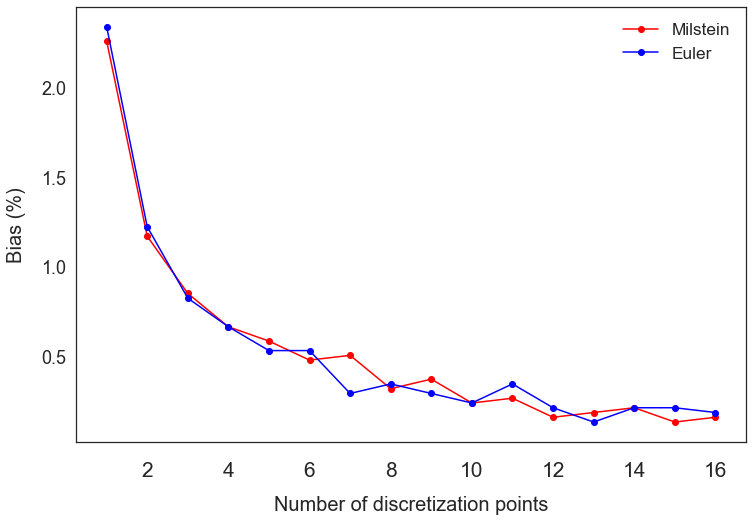

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm
plt.style.use('seaborn-white')

from option import Option 
from process import HestonProcess
from pricing import monte_carlo_simulation, heston_semi_closed

m_list = range(1, 16 + 1)

put = Option(s0=36, v0=0.04, T=1, K=40, call=False)
heston = HestonProcess(mu=0.06, kappa=0.0005, theta=0.04, eta=0.1, rho=-0.5)
heston_euler = HestonProcess(mu=0.06, kappa=0.0005, theta=0.04, eta=0.1, rho=-0.5, milstein=False)

exact_price = heston_semi_closed(option=put, process=heston)
print(exact_price)

errors = []
errors_euler = []

plt.figure(figsize=(12, 8))
for i, m in enumerate(m_list):
    print(i)
    mc_price = monte_carlo_simulation(option=put, process=heston, n=5_000_000, m=m)
    mc_price_euler = monte_carlo_simulation(option=put, process=heston, n=5_000_000, m=m)
    error = np.abs(exact_price - mc_price) / exact_price * 100
    error_euler = np.abs(exact_price - mc_price_euler) / exact_price * 100
    errors.append(error)
    errors_euler.append(error_euler)

plt.plot(m_list, errors, c='r', marker='o')
plt.plot(m_list, errors_euler, c='b', marker='o')

plt.xlabel('Number of discretization points', fontsize=20, labelpad=15)
plt.ylabel('Bias (%)', fontsize=20, labelpad=15)
plt.tick_params(axis='y', which='major', labelsize=18, pad=10)
plt.tick_params(axis='x', which='major', labelsize=21, pad=20)
plt.legend(['Milstein', 'Euler'], fontsize='xx-large')
plt.show()

=1, K=40, v0=0.04, call=False) = 3.78
95.0% confidence interval = [2.94, 4.63]
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 4.6869
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 4.9992
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 4.4965
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 4.13
95.0% confidence interval = [3.18, 5.07]
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 4.4965
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 4.9602
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 4.9749
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.95
95.0% confidence interval = [3.08, 4.83]
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 4.9749
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 4.4299
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 5.1382
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 3.93
95.0% confidence interval = [

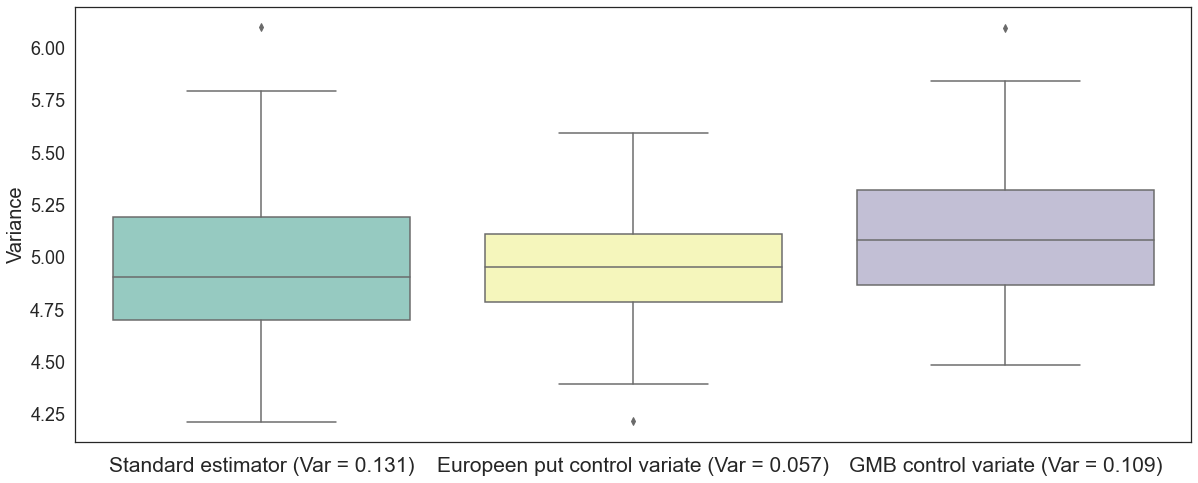

In [29]:
import numpy as np 
import seaborn as sns
from option import Option
from process import GeometricBrownianMotion, HestonProcess
from pricing import monte_carlo_simulation, monte_carlo_simulation_LS, heston_semi_closed, crr_pricing


put = Option(s0=36, v0=0.04, T=1, K=40, call=False)
gmb = GeometricBrownianMotion(mu=.06, sigma=.2)
heston = HestonProcess(mu=0.06, kappa=0.0005, theta=0.04, eta=0.1, rho=-0.5)

europeen_put_price = heston_semi_closed(option=put, process=heston)
price_crr = crr_pricing(r=.06, sigma=.2, option=put, n=25_000)

n = 100
price_ls_list = []
price_cd_list = []
price_cd2_list = []

for i in range(1, 100):

    price_gmb, X_gmb = monte_carlo_simulation_LS(option=put, process=gmb, n=n, m=100, return_all=True, seed=i)
    price_heston, Y_heston = monte_carlo_simulation_LS(option=put, process=heston, n=n, m=100, return_all=True, seed=i)

    price_mc, X_europeen = monte_carlo_simulation(option=put, process=heston, n=n, m=100, return_all=True, seed=i)
    price_ls, Y_americain = monte_carlo_simulation_LS(option=put, process=heston, n=n, m=100, return_all=True, seed=i)

    c_star_1 = np.cov(X_gmb, Y_heston)[0, 1]/np.cov(X_gmb, Y_heston)[1, 1]
    c_star_2 = np.cov(X_europeen, Y_americain)[0, 1]/np.cov(X_europeen, Y_americain)[1, 1]

    price_cd_1 = price_heston - c_star_1 * (price_gmb - price_crr)
    price_cd_2 = price_ls - c_star_2 * (price_mc - europeen_put_price)
    
    price_ls_list.append(price_heston)
    price_cd_list.append(price_cd_1)
    price_cd2_list.append(price_cd_2)

results = pd.DataFrame({f'Standard estimator (Var = {np.round(np.var(price_ls_list), 3)})': price_ls_list,
                        f'Europeen put control variate (Var = {np.round(np.var(price_cd2_list), 3)})': price_cd2_list,
                        f'GMB control variate (Var = {np.round(np.var(price_cd_list), 3)})': price_cd_list})


plt.figure(figsize=(20, 8))
sns.boxplot(data=results)
plt.ylabel("Variance", size=20)
plt.tick_params(axis='y', which='major', labelsize=18, pad=10)
plt.tick_params(axis='x', which='major', labelsize=21, pad=15)

The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 5.0197
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 4.4084
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 4.7707
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 5.0411
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 4.7606
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 4.5311
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 4.9384
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 4.4353
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 5.2138
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 4.6549
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 4.3097
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 5.1422
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 4.7244
The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 5.0801
The price of Option(s0=36, T=1, K=40, v0=0.04, c

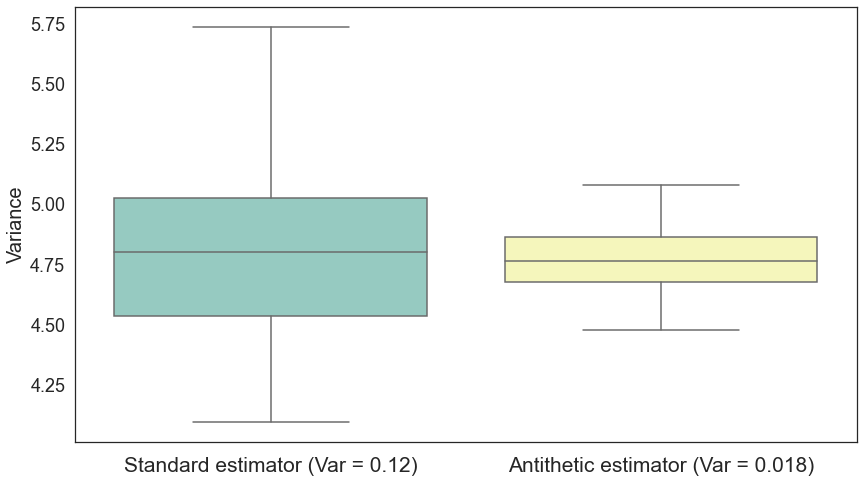

In [30]:
import seaborn as sns

put = Option(s0=36, v0=0.04, T=1, K=40, call=False)
heston = HestonProcess(mu=0.06, kappa=0.0005, theta=0.04, eta=0.1, rho=-0.5)


n = 100
price_list = []
price_antithetic_list = []

for i in range(1, 100):

    price = monte_carlo_simulation_LS(option=put, process=heston, n=n, m=20, seed=i)
    price_antithetic = monte_carlo_simulation_LS(option=put, process=heston, n=n, m=20, antithetic=True, seed=i)

    price_antithetic = (price + price_antithetic) / 2

    price_list.append(price)
    price_antithetic_list.append(price_antithetic)

results = pd.DataFrame({f'Standard estimator (Var = {np.round(np.var(price_list), 3)})': price_list, 
                        f'Antithetic estimator (Var = {np.round(np.var(price_antithetic_list), 3)})': price_antithetic_list})

plt.figure(figsize=(14, 8))
sns.boxplot(data=results)
plt.ylabel("Variance", size=20)
plt.tick_params(axis='y', which='major', labelsize=18, pad=10)
plt.tick_params(axis='x', which='major', labelsize=21, pad=15)

In [25]:
_, X_americain = monte_carlo_simulation_LS(option=put, process=heston, n=10000, m=20, return_all=True)

The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 4.3602


The price of Option(s0=36, T=1, K=40, v0=0.04, call=False) = 4.3227


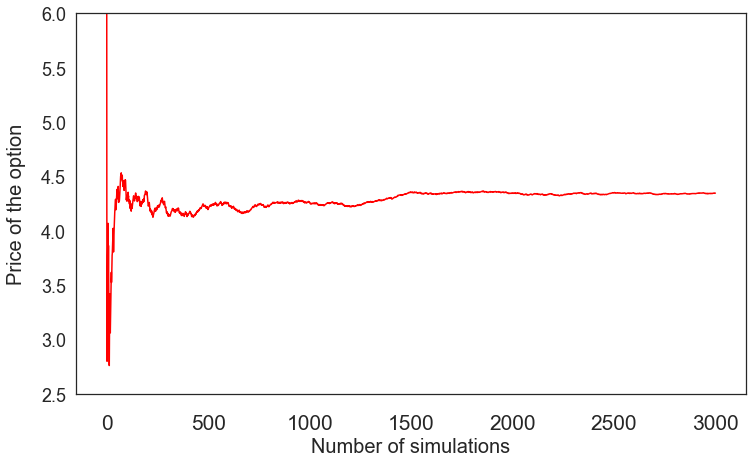

In [45]:
_, X_americain = monte_carlo_simulation_LS(option=put, process=heston, n=5000, m=20, return_all=True, seed=1)

p = pd.Series(X_americain)

plt.figure(figsize=(12, 7))
p.expanding().mean().iloc[:3000].plot(c='r')
plt.ylim(2.5, 6)
plt.xlabel('Number of simulations', fontsize=20)
plt.ylabel('Price of the option', fontsize=20, labelpad=15)
plt.tick_params(axis='y', which='major', labelsize=18, pad=15)
plt.tick_params(axis='x', which='major', labelsize=21, pad=20)